In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = np.load('data/openaq_processed.npz')['data']
data.shape

(168, 40, 40)

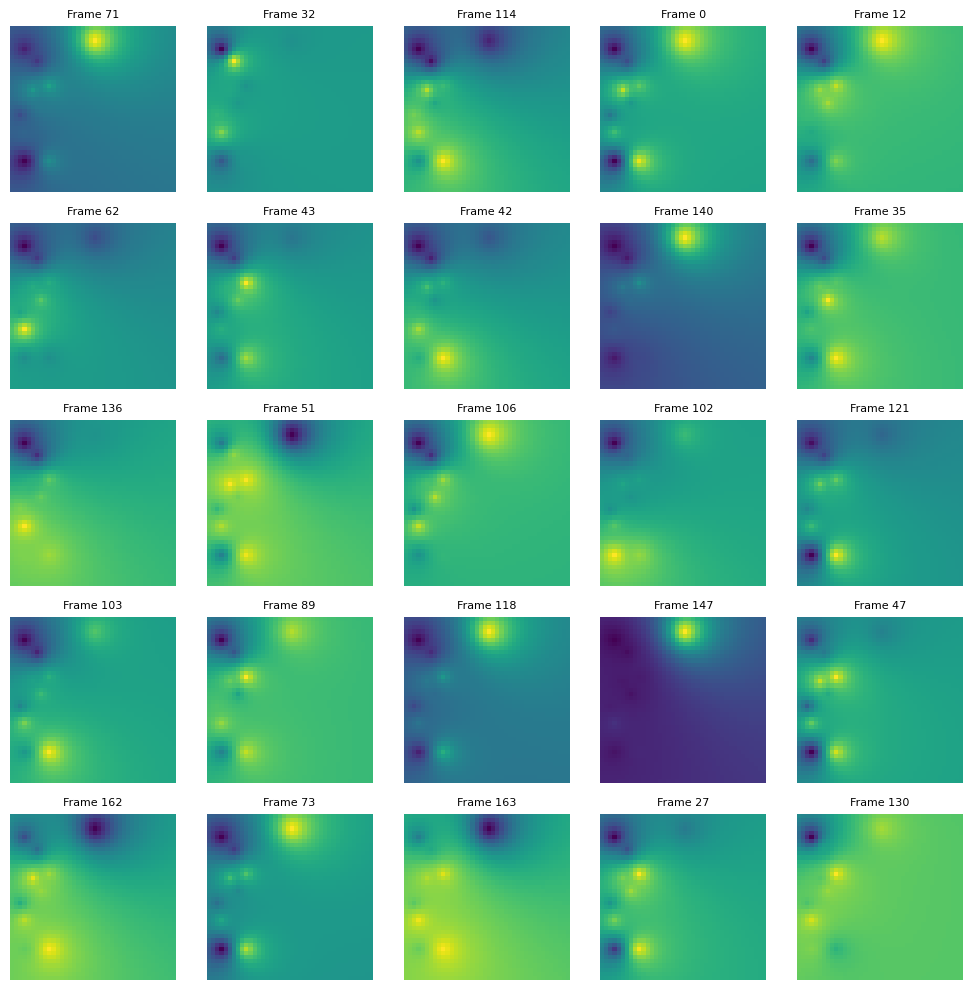

In [3]:
# Pick 25 random indices without replacement
indices = np.random.choice(data.shape[0], size=25, replace=False)

# Create a 5x5 subplot grid
fig, axes = plt.subplots(5, 5, figsize=(10, 10))

for ax, idx in zip(axes.flat, indices):
    ax.imshow(data[idx])
    ax.axis('off')   # hide axes
    ax.set_title(f"Frame {idx}", fontsize=8)

plt.tight_layout()
plt.show()

In [4]:
import sys
sys.path.append('/home/mgraca/Workspace/hrrr-smoke-viz')
from libs.openaqdata import OpenAQData

OAQD = OpenAQData(save_dir='/home/mgraca/Workspace/hrrr-smoke-viz/pwwb-experiments/tensorflow/cached_data/two_years_sat_data/openaq_cache', load_numpy=True)
OAQD.data.shape

/home/mgraca/miniconda3/envs/hrrrenv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


📂 Loading numpy data from /home/mgraca/Workspace/hrrr-smoke-viz/pwwb-experiments/tensorflow/cached_data/two_years_sat_data/openaq_cache/openaq_processed.npz... ✅ Completed!



(17544, 40, 40)

In [5]:
# number of unique sensor locations
len(set(list(OAQD.sensor_locations.values())))

129

In [6]:
pd.DataFrame({
    'sensor' : OAQD.sensor_locations.keys(),
    'x, y' : OAQD.sensor_locations.values()
})

,sensor,"x, y"
0,Glendora - Laurel,"(14, 21)"
1,Temecula (Lake Skinn,"(36, 39)"
2,Mira Loma - Van Bure,"(20, 29)"
3,Compton,"(23, 13)"
4,Santa Clarita,"(4, 6)"
...,...,...
197,Imperial Hwy.,"(22, 12)"
198,UltimateReality,"(14, 15)"
199,Westminster El (7699),"(20, 7)"
200,Jordan HS (8721),"(22, 12)"


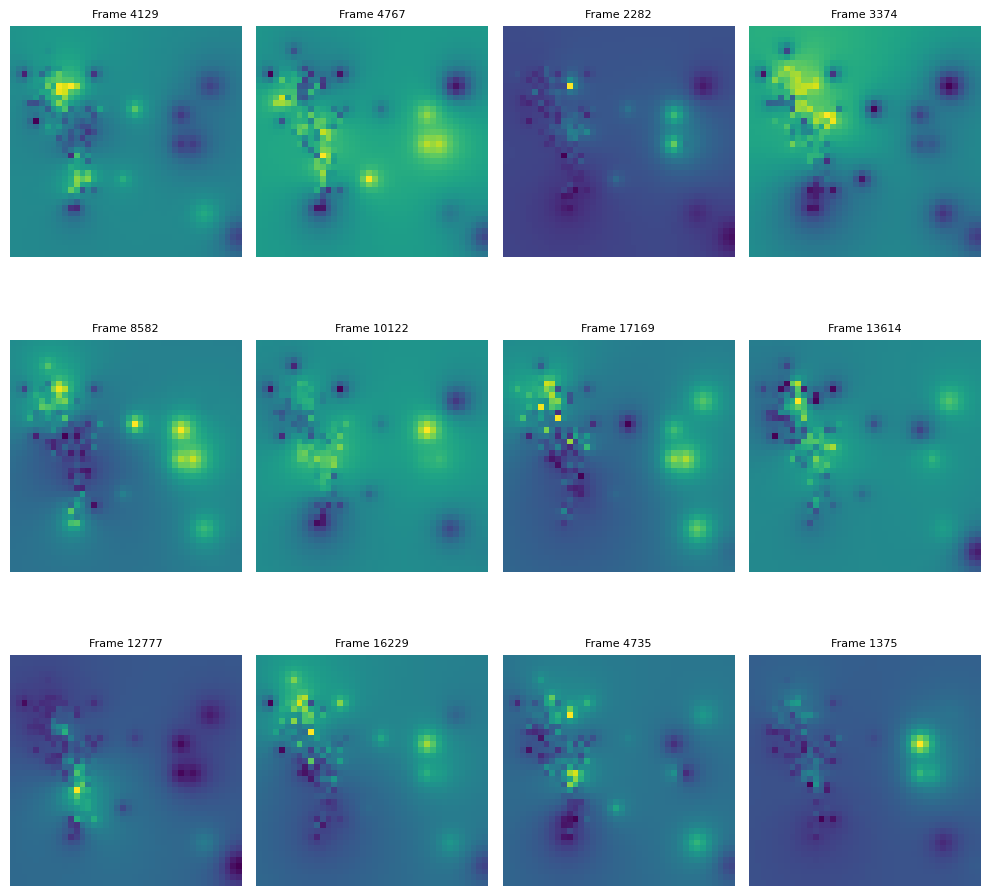

In [7]:
# Pick 12 random indices without replacement
indices = np.random.choice(OAQD.data.shape[0], size=12, replace=False)

# Create a 5x5 subplot grid
fig, axes = plt.subplots(3, 4, figsize=(10, 10))

for ax, idx in zip(axes.flat, indices):
    ax.imshow(OAQD.data[idx])
    ax.axis('off')   # hide axes
    ax.set_title(f"Frame {idx}", fontsize=8)

plt.tight_layout()
plt.show()

(17544, 40, 40)


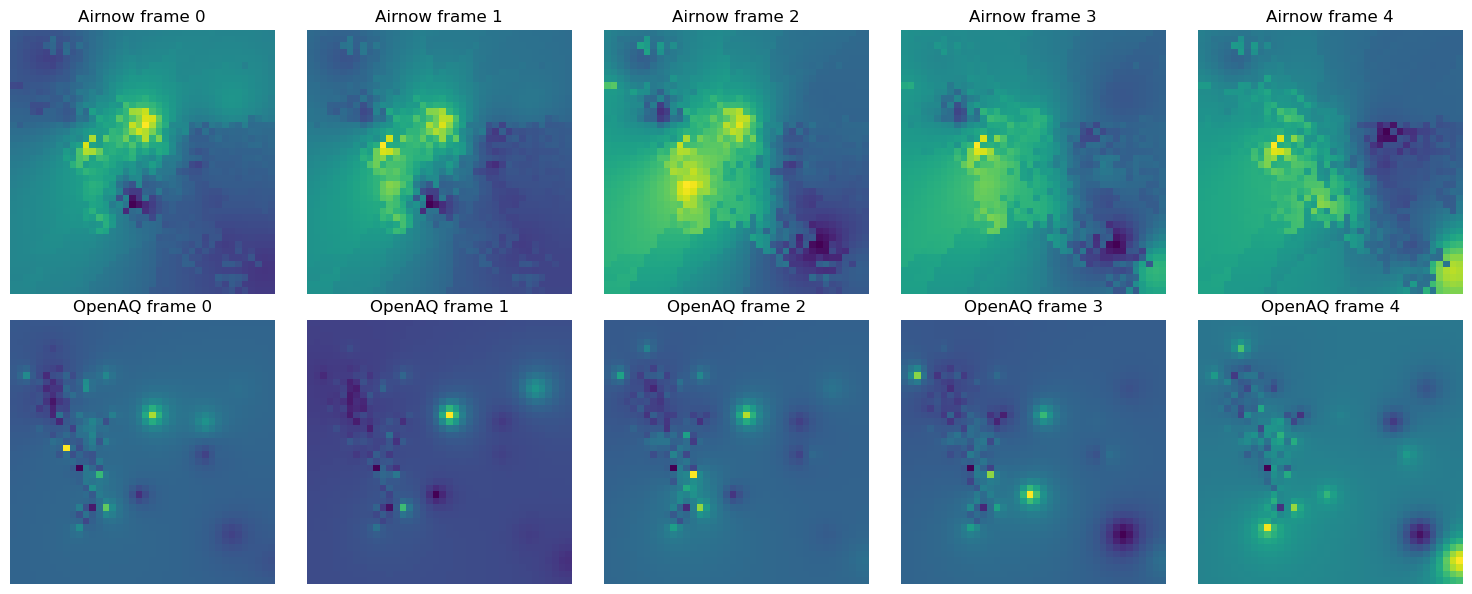

In [10]:
airnow = np.load('/home/mgraca/Workspace/hrrr-smoke-viz/pwwb-experiments/tensorflow/cached_data/two_years_sat_data/airnow_cache/airnow_processed.npz')['data']
print(airnow.shape)
num_frames = 5

fig, axes = plt.subplots(2, num_frames, figsize=(15, 6))

for i in range(num_frames):
    axes[0, i].imshow(airnow[i])
    axes[0, i].axis('off')
    axes[0, i].set_title(f"Airnow frame {i}")

    axes[1, i].imshow(OAQD.data[i])
    axes[1, i].axis('off')
    axes[1, i].set_title(f"OpenAQ frame {i}")

plt.tight_layout()
plt.show()